In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neural_network
from tabulate import tabulate
import data_preprocessing
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [8]:

# np & pd 관련 설정
np.random.seed(42)
np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = '{:.3f}'.format

In [16]:
train_data = pd.read_csv("data/KBO_TRAIN.csv")
train_data.dropna()


,SEASON,TEAM,AVG,OBP,SLG,ERA,WHIP,GRADE
1,20,LG,0.277,0.349,0.428,4.390,1.420,3.000
2,20,KT,0.284,0.358,0.436,4.560,1.460,2.000
3,20,키움,0.269,0.355,0.408,4.390,1.390,5.000
4,20,NC,0.291,0.366,0.462,4.590,1.420,1.000
5,20,삼성,0.268,0.338,0.394,4.780,1.470,8.000
6,20,SSG,0.250,0.329,0.383,5.600,1.600,9.000
7,20,롯데,0.276,0.354,0.408,4.640,1.410,7.000
8,20,두산,0.293,0.365,0.427,4.400,1.460,3.000
9,20,한화,0.245,0.320,0.338,5.290,1.590,10.000
10,20,KIA,0.274,0.351,0.404,5.140,1.540,6.000


In [9]:
# 훈련 데이터 로드
train_data = pd.read_csv("data/KBO_TRAIN.csv")

# 전처리
X_train, y_train = train_data.drop('GRADE', axis=1), train_data['GRADE']
X_train = data_preprocessing.preprocess_X(X_train)
y_train = data_preprocessing.preprocess_y(y_train)

# 스케일링
X_train, mean, std = data_preprocessing.standard_X(X_train)

In [13]:
y_train


1     3.000
2     2.000
3     5.000
4     1.000
5     8.000
6     9.000
7     7.000
8     3.000
9    10.000
10    6.000
12    3.000
13    1.000
14   10.000
15    6.000
16    5.000
17    1.000
18    7.000
19    4.000
20    9.000
21    8.000
23    2.000
24    1.000
25    3.000
26    3.000
27    5.000
28    6.000
29   10.000
30    7.000
31    9.000
32    8.000
Name: GRADE, dtype: float64

<AxesSubplot:>

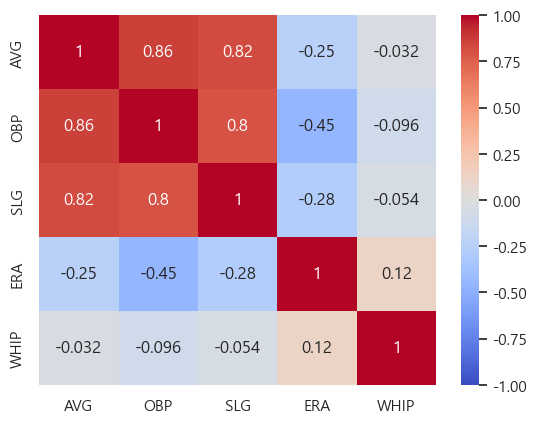

In [17]:
sns.heatmap(X_train.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)


In [18]:

# Assuming the necessary libraries are imported, and the neural network class is defined
nn = neural_network.neuralnetwork()

# Training
learning_rate = 0.01
epochs = 829
output_1 = nn.train(X_train, y_train, learning_rate, epochs)


100%|█████████████████████████████████████████████████████| 829/829 [00:03<00:00, 207.48it/s]


In [19]:
# 뉴럴네트워크 생성
nn2 = neural_network.neuralnetwork()

# Xavier initialization
nn2.xavier_initialization()

# 학습
learning_rate = 0.01
epochs = 829
output_2 = nn2.train(X_train, y_train, learning_rate, epochs)

100%|█████████████████████████████████████████████████████| 829/829 [00:03<00:00, 207.49it/s]


In [14]:

# 테스트 데이터 로드
test_data = pd.read_csv("data/KBO_TEST.csv")

# 전처리
X_test, y_test = test_data.drop('GRADE', axis=1), test_data['GRADE']
X_test = data_preprocessing.preprocess_X(X_test)
y_test = data_preprocessing.preprocess_y(y_test)

# 스케일링
X_test, mean, std = data_preprocessing.standard_X(X_test, mean = mean, std = std)

# 예측
pred_top3, pred_detail = nn.predict(X_test, y_test, TEAM = test_data.dropna()['TEAM'])

NameError: name 'nn' is not defined

In [21]:
print(tabulate(pred_top3, headers='keys', tablefmt='psql'))
print(tabulate(pred_detail, headers='keys', tablefmt='psql', floatfmt=".3f"))


+----+------+------+-------+--------+-------+--------+------+--------+--------+--------+
|    |   LG |   NC |   SSG |   두산 |   KIA |   키움 |   KT |   한화 |   삼성 |   롯데 |
|----+------+------+-------+--------+-------+--------+------+--------+--------+--------|
|  1 |    1 |    2 |     6 |      7 |     3 |      3 |    8 |      9 |      9 |      9 |
|  2 |    4 |    3 |     7 |      6 |     2 |      2 |    6 |      6 |     10 |     10 |
|  3 |    3 |    4 |     5 |      5 |     5 |      5 |    7 |     10 |      6 |      6 |
+----+------+------+-------+--------+-------+--------+------+--------+--------+--------+


In [29]:
import joblib

# 모델 저장
model = neural_network.neuralnetwork()  # 예시로 neuralnetwork 모델이라 가정
model.fit(X_train, y_train)  # 모델 학습
joblib.dump(model, "path_to_your_model.pkl")


AttributeError: 'neuralnetwork' object has no attribute 'fit'

In [27]:
import joblib

# Load the model from the file
model_filename = "path_to_your_model.pkl"
loaded_model = joblib.load(model_filename)

# Perform a prediction with the loaded model using `X_test`
# Assuming `X_test` contains the test data on which you want to make predictions
loaded_model


In [26]:
print(tabulate(pred_detail, headers='keys', tablefmt='psql', floatfmt=".3f"))


+----+-------+-------+-------+--------+-------+--------+-------+--------+--------+--------+
|    |    LG |    NC |   SSG |   두산 |   KIA |   키움 |    KT |   한화 |   삼성 |   롯데 |
|----+-------+-------+-------+--------+-------+--------+-------+--------+--------+--------|
|  1 | 0.947 | 0.003 | 0.057 |  0.059 | 0.000 |  0.000 | 0.001 |  0.007 |  0.000 |  0.001 |
|  2 | 0.000 | 0.850 | 0.000 |  0.002 | 0.026 |  0.024 | 0.000 |  0.000 |  0.000 |  0.000 |
|  3 | 0.010 | 0.143 | 0.009 |  0.079 | 0.974 |  0.975 | 0.001 |  0.003 |  0.000 |  0.000 |
|  4 | 0.042 | 0.004 | 0.033 |  0.043 | 0.000 |  0.000 | 0.001 |  0.006 |  0.000 |  0.001 |
|  5 | 0.001 | 0.000 | 0.113 |  0.202 | 0.000 |  0.000 | 0.030 |  0.030 |  0.001 |  0.005 |
|  6 | 0.000 | 0.000 | 0.327 |  0.246 | 0.000 |  0.000 | 0.266 |  0.273 |  0.038 |  0.148 |
|  7 | 0.000 | 0.000 | 0.318 |  0.264 | 0.000 |  0.000 | 0.232 |  0.099 |  0.008 |  0.040 |
|  8 | 0.000 | 0.000 | 0.102 |  0.100 | 0.000 |  0.000 | 0.465 |  0.094 |  0.012 |  0.067 

In [30]:
# pred_top3 저장
pred_top3_df = pd.DataFrame(pred_top3, columns=['Team', 'Probability'])
pred_top3_df.to_csv('pred_top3.csv', index=False)

# pred_detail 저장
pred_detail.to_csv('pred_detail.csv', index=False)


Text(0, 0.5, '확률')

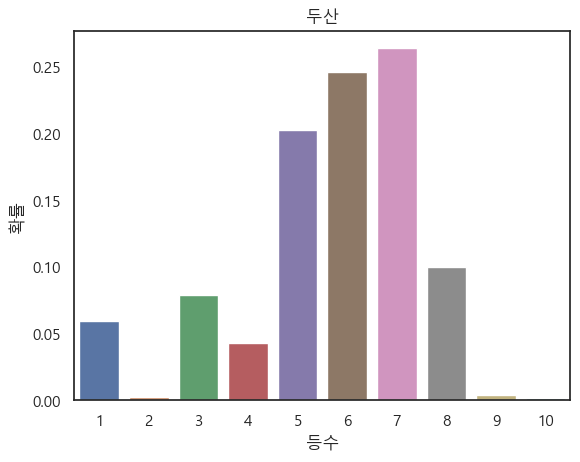

In [12]:
sns.barplot(x=pred_detail['두산'].index, y=pred_detail['두산'].values)

plt.title('두산')
plt.xlabel('등수')
plt.ylabel('확률')

Text(0, 0.5, '확률')

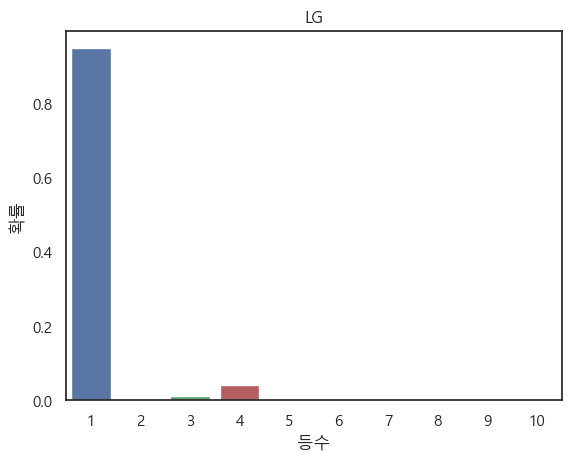

In [80]:
sns.barplot(x=pred_detail['LG'].index, y=pred_detail['LG'].values)
plt.title('LG')
plt.xlabel('등수')
plt.ylabel('확률')

In [109]:
pred_detail

,LG,NC,SSG,두산,KIA,키움,KT,한화,삼성,롯데
1,0.947,0.003,0.057,0.059,0.000,0.000,0.001,0.007,0.000,0.001
2,0.000,0.850,0.000,0.002,0.026,0.024,0.000,0.000,0.000,0.000
3,0.010,0.143,0.009,0.079,0.974,0.975,0.001,0.003,0.000,0.000
4,0.042,0.004,0.033,0.043,0.000,0.000,0.001,0.006,0.000,0.001
5,0.001,0.000,0.113,0.202,0.000,0.000,0.030,0.030,0.001,0.005
6,0.000,0.000,0.327,0.246,0.000,0.000,0.266,0.273,0.038,0.148
7,0.000,0.000,0.318,0.264,0.000,0.000,0.232,0.099,0.008,0.040
8,0.000,0.000,0.102,0.100,0.000,0.000,0.465,0.094,0.012,0.067
9,0.000,0.000,0.030,0.004,0.000,0.000,0.004,0.287,0.478,0.449
10,0.000,0.000,0.010,0.001,0.000,0.000,0.001,0.201,0.464,0.290


In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neural_network
from tabulate import tabulate
import data_preprocessing
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
# np & pd 관련 설정
np.random.seed(42)
np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = '{:.3f}'.format
# 훈련 데이터 로드
train_data = pd.read_csv("data/KBO_TRAIN.csv")

# 전처리
X_train, y_train = train_data.drop('GRADE', axis=1), train_data['GRADE']
X_train = data_preprocessing.preprocess_X(X_train)
y_train = data_preprocessing.preprocess_y(y_train)

# 스케일링
X_train, mean, std = data_preprocessing.standard_X(X_train)
# Assuming the necessary libraries are imported, and the neural network class is defined
nn = neural_network.neuralnetwork()

# Training
learning_rate = 0.01
epochs = 829
output_1 = nn.train(X_train, y_train, learning_rate, epochs)

# 뉴럴네트워크 생성
nn2 = neural_network.neuralnetwork()

# Xavier initialization
nn2.xavier_initialization()

# 학습
learning_rate = 0.01
epochs = 829
output_2 = nn2.train(X_train, y_train, learning_rate, epochs)
# 테스트 데이터 로드
test_data = pd.read_csv("data/KBO_TEST.csv")

# 전처리
X_test, y_test = test_data.drop('GRADE', axis=1), test_data['GRADE']
X_test = data_preprocessing.preprocess_X(X_test)
y_test = data_preprocessing.preprocess_y(y_test)

# 스케일링
X_test, mean, std = data_preprocessing.standard_X(X_test, mean = mean, std = std)

# 예측
pred_top3, pred_detail = nn.predict(X_test, y_test, TEAM = test_data.dropna()['TEAM'])



100%|█████████████████████████████████████████████████████| 829/829 [00:03<00:00, 207.41it/s]


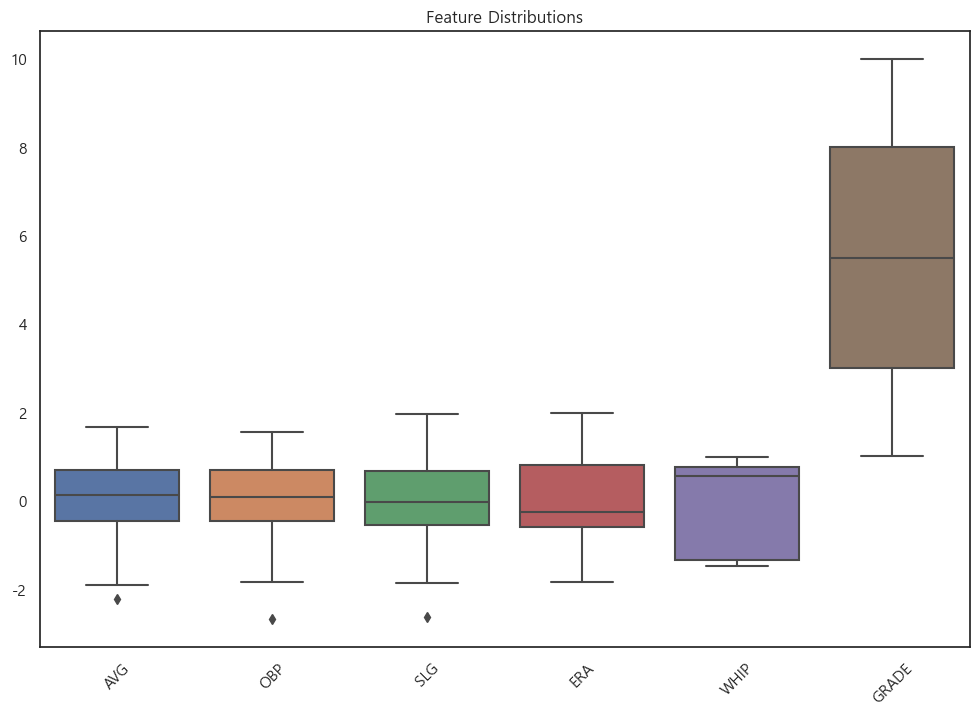

<Figure size 1200x800 with 0 Axes>

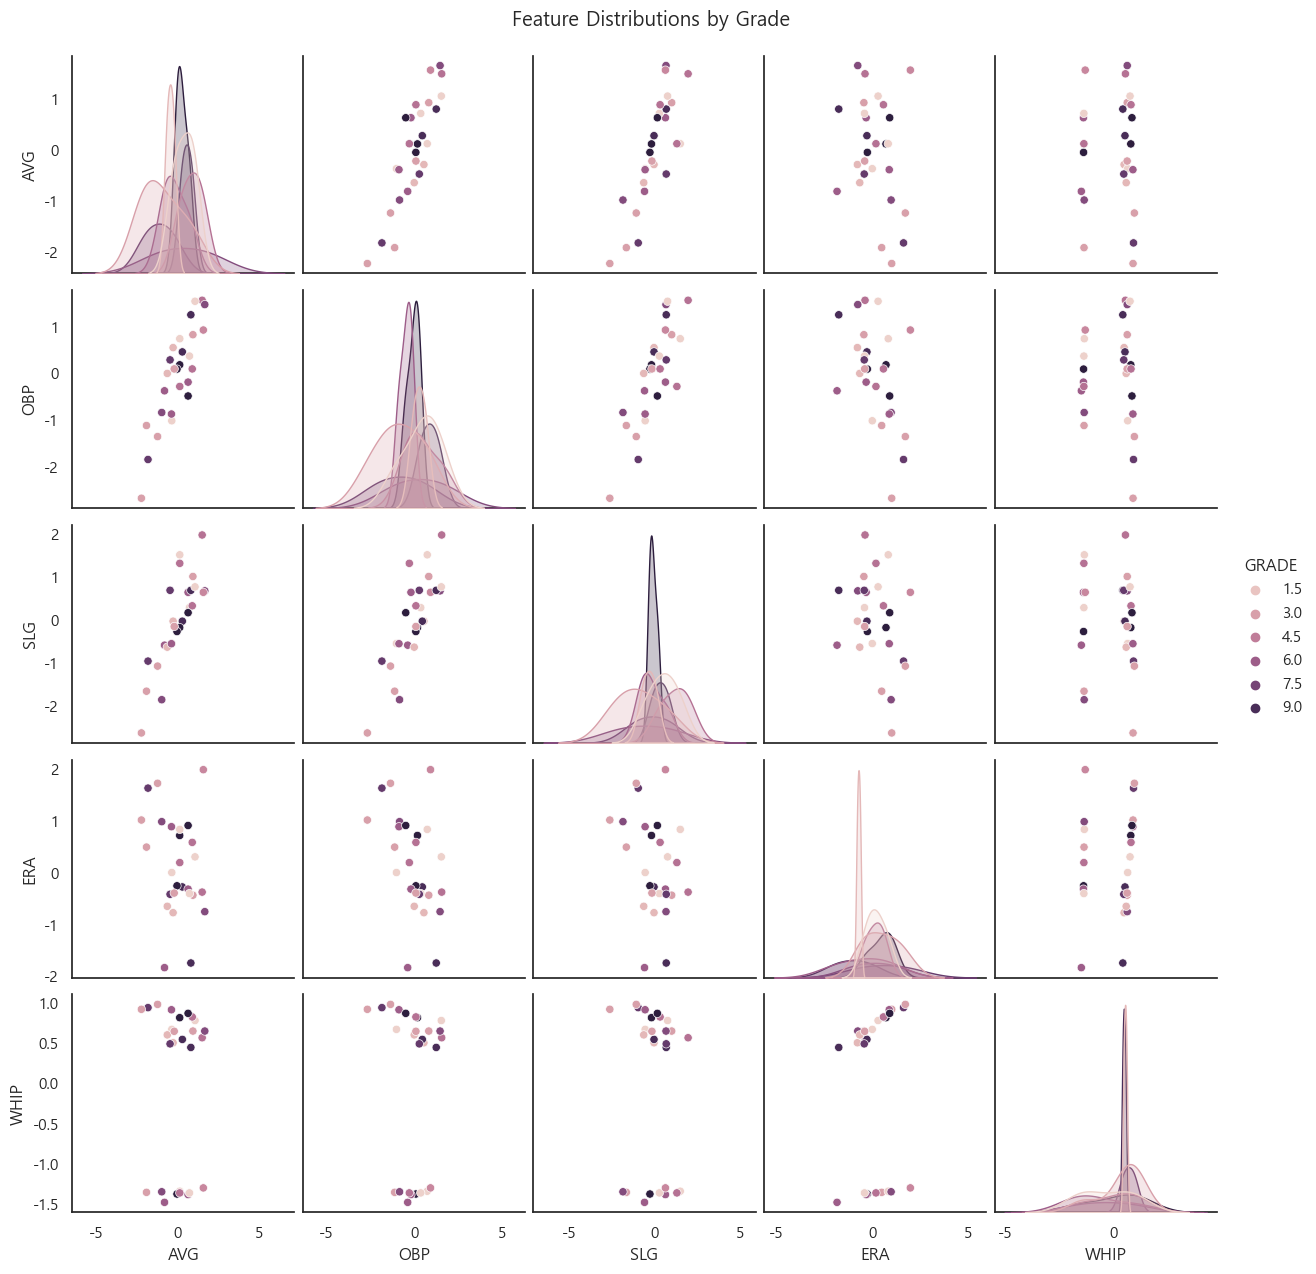

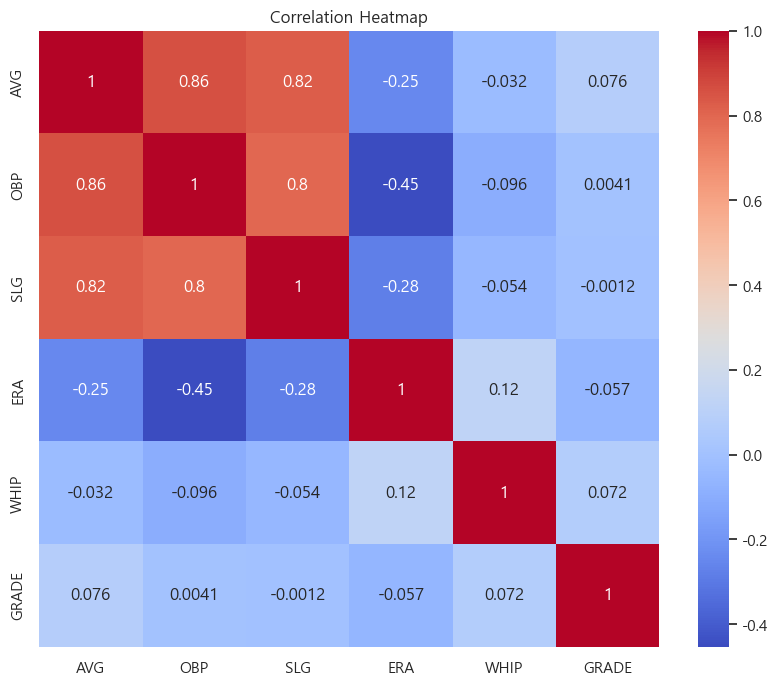

100%|█████████████████████████████████████████████████████| 829/829 [00:04<00:00, 205.68it/s]


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

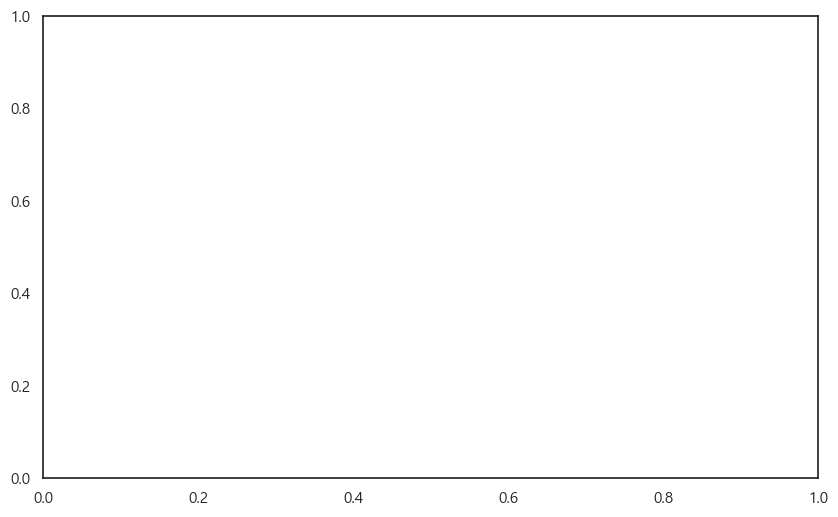

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neural_network
import data_preprocessing
import warnings

warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
plt.rc("font", family="Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False}, style='white')

# np & pd 관련 설정
np.random.seed(42)
np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = '{:.3f}'.format

# 훈련 데이터 로드
train_data = pd.read_csv("data/KBO_TRAIN.csv")

# 전처리
# 3년치 각팀, 리그 평균 주요 팀 지표
# 승패를 가르는 기본 지표
X_train, y_train = train_data.drop('GRADE', axis=1), train_data['GRADE']
X_train = data_preprocessing.preprocess_X(X_train)
y_train = data_preprocessing.preprocess_y(y_train)

# 스케일링
X_train, mean, std = data_preprocessing.standard_X(X_train)

# 데이터 탐색 및 시각화
train_data_explore = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(12, 8))
sns.boxplot(data=train_data_explore)
plt.xticks(rotation=45)
plt.title('Feature Distributions')
plt.show()

plt.figure(figsize=(12, 8))
sns.pairplot(train_data_explore, hue='GRADE', diag_kind='kde')
plt.suptitle('Feature Distributions by Grade', y=1.02)
plt.show()

corr_matrix = train_data_explore.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Assuming the necessary libraries are imported, and the neural network class is defined
nn = neural_network.neuralnetwork()

# Training
# learning_rate: 학습률은 모델의 가중치를 업데이트할 때 얼마나 크게 업데이트할지를 결정하는 하이퍼파라미터입니다.
# epochs: 에포크는 전체 데이터셋을 몇 번 반복해서 학습할지를 결정하는 하이퍼파라미터입니다.
learning_rate = 0.01
epochs = 829
output_1 = nn.train(X_train, y_train, learning_rate, epochs)
# output_1은 nn.train()에서 반환된 결과로 가정합니다.

# 손실 값 시각화
plt.figure(figsize=(10, 6))
plt.plot(output_1['epoch'], output_1['loss'], marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid()
plt.show()

# 뉴럴네트워크 생성
nn2 = neural_network.neuralnetwork()

# Xavier initialization
nn2.xavier_initialization()

# 학습
output_2 = nn2.train(X_train, y_train, learning_rate, epochs)

# 테스트 데이터 로드
test_data = pd.read_csv("data/KBO_TEST.csv")

# 전처리
X_test, y_test = test_data.drop('GRADE', axis=1), test_data['GRADE']
X_test = data_preprocessing.preprocess_X(X_test)
y_test = data_preprocessing.preprocess_y(y_test)

# 스케일링
X_test, _, _ = data_preprocessing.standard_X(X_test, mean=mean, std=std)

# 예측
pred_top3, pred_detail = nn.predict(X_test, y_test, TEAM=test_data.dropna()['TEAM'])


In [7]:
print(tabulate(pred_top3, headers='keys', tablefmt='psql'))
print(tabulate(pred_detail, headers='keys', tablefmt='psql', floatfmt=".3f"))

+----+------+------+-------+--------+-------+--------+------+--------+--------+--------+
|    |   LG |   NC |   SSG |   두산 |   KIA |   키움 |   KT |   한화 |   삼성 |   롯데 |
|----+------+------+-------+--------+-------+--------+------+--------+--------+--------|
|  1 |    1 |    2 |     6 |      7 |     3 |      3 |    8 |      9 |      9 |      9 |
|  2 |    4 |    3 |     7 |      6 |     2 |      2 |    6 |      6 |     10 |     10 |
|  3 |    3 |    4 |     5 |      5 |     5 |      5 |    7 |     10 |      6 |      6 |
+----+------+------+-------+--------+-------+--------+------+--------+--------+--------+
+----+-------+-------+-------+--------+-------+--------+-------+--------+--------+--------+
|    |    LG |    NC |   SSG |   두산 |   KIA |   키움 |    KT |   한화 |   삼성 |   롯데 |
|----+-------+-------+-------+--------+-------+--------+-------+--------+--------+--------|
|  1 | 0.947 | 0.003 | 0.057 |  0.059 | 0.000 |  0.000 | 0.001 |  0.007 |  0.000 |  0.001 |
|  2 | 0.000 | 0.850 | 0.000 

In [23]:
pred_detail

,LG,NC,SSG,두산,KIA,키움,KT,한화,삼성,롯데
1,0.947,0.003,0.057,0.059,0.000,0.000,0.001,0.007,0.000,0.001
2,0.000,0.850,0.000,0.002,0.026,0.024,0.000,0.000,0.000,0.000
3,0.010,0.143,0.009,0.079,0.974,0.975,0.001,0.003,0.000,0.000
4,0.042,0.004,0.033,0.043,0.000,0.000,0.001,0.006,0.000,0.001
5,0.001,0.000,0.113,0.202,0.000,0.000,0.030,0.030,0.001,0.005
6,0.000,0.000,0.327,0.246,0.000,0.000,0.266,0.273,0.038,0.148
7,0.000,0.000,0.318,0.264,0.000,0.000,0.232,0.099,0.008,0.040
8,0.000,0.000,0.102,0.100,0.000,0.000,0.465,0.094,0.012,0.067
9,0.000,0.000,0.030,0.004,0.000,0.000,0.004,0.287,0.478,0.449
10,0.000,0.000,0.010,0.001,0.000,0.000,0.001,0.201,0.464,0.290


In [82]:
, LG, NC, SSG, 두산, KIA, 키움, KT, 한화, 삼성, 롯데
1, 0.947, 0.003, 0.057, 0.059, 0.000, 0.000, 0.001, 0.007, 0.000, 0.001
2, 0.000, 0.850, 0.000, 0.002, 0.026, 0.024, 0.000, 0.000, 0.000, 0.000
3, 0.010, 0.143, 0.009, 0.079, 0.974, 0.975, 0.001, 0.003, 0.000, 0.000
4, 0.042, 0.004, 0.033, 0.043, 0.000, 0.000, 0.001, 0.006, 0.000, 0.001
5, 0.001, 0.000, 0.113, 0.202, 0.000, 0.000, 0.030, 0.030, 0.001, 0.005
6, 0.000, 0.000, 0.327, 0.246, 0.000, 0.000, 0.266, 0.273, 0.038, 0.148
7, 0.000, 0.000, 0.318, 0.264, 0.000, 0.000, 0.232, 0.099, 0.008, 0.040
8, 0.000, 0.000, 0.102, 0.100, 0.000, 0.000, 0.465, 0.094, 0.012, 0.067
9, 0.000, 0.000, 0.030, 0.004, 0.000, 0.000, 0.004, 0.287, 0.478, 0.449
10, 0.000, 0.000, 0.010, 0.001, 0.000, 0.000, 0.001, 0.201, 0.464, 0.290


In [26]:
import pandas as pd

# 예측 값을 딕셔너리에서 DataFrame으로 변환
pred_detail_df = pd.DataFrame(pred_detail)
pred_detail_df = pred_detail_df.transpose()  # 행과 열을 바꿈
pred_detail_df.reset_index(inplace=True)
pred_detail_df.columns = ['Team', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']  # 컬럼 이름 설정
pred_detail_df
# DataFrame을 CSV 파일로 저장


,Team,1,2,3,4,5,6,7,8,9,10
0,LG,0.947,0.000,0.010,0.042,0.001,0.000,0.000,0.000,0.000,0.000
1,NC,0.003,0.850,0.143,0.004,0.000,0.000,0.000,0.000,0.000,0.000
2,SSG,0.057,0.000,0.009,0.033,0.113,0.327,0.318,0.102,0.030,0.010
3,두산,0.059,0.002,0.079,0.043,0.202,0.246,0.264,0.100,0.004,0.001
4,KIA,0.000,0.026,0.974,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,키움,0.000,0.024,0.975,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,KT,0.001,0.000,0.001,0.001,0.030,0.266,0.232,0.465,0.004,0.001
7,한화,0.007,0.000,0.003,0.006,0.030,0.273,0.099,0.094,0.287,0.201
8,삼성,0.000,0.000,0.000,0.000,0.001,0.038,0.008,0.012,0.478,0.464
9,롯데,0.001,0.000,0.000,0.001,0.005,0.148,0.040,0.067,0.449,0.290


1    0.001
2    0.000
3    0.000
4    0.001
5    0.005
6    0.148
7    0.040
8    0.067
9    0.449
10   0.290
Name: 롯데, dtype: float64

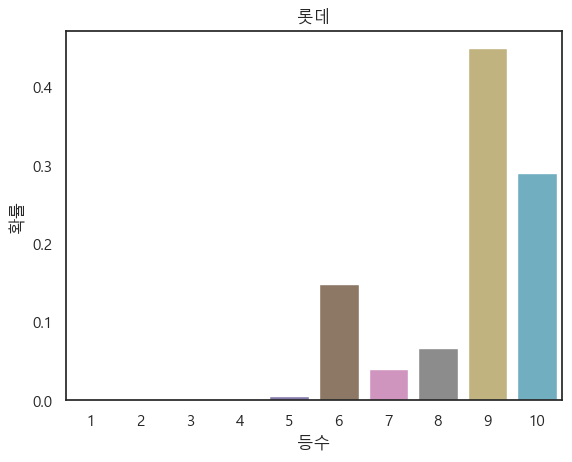

In [39]:
sns.barplot(x=pred_detail['롯데'].index, y=pred_detail['롯데'].values)
plt.title('롯데')
plt.xlabel('등수')
plt.ylabel('확률')
plt.savefig('롯데')
pred_detail['롯데']

In [118]:
# Assuming `pred_top3` is a Pandas DataFrame containing the top 3 predictions for each team
# Make sure `pred_top3` has the "Team" and "Probability" columns with valid data

# Drop rows with missing data
pred_top3_cleaned = pred_top3.dropna()

# Save to CSV
pred_top3_cleaned.to_csv("predictions_top3.csv", index=False)


In [119]:
pred_top3_cleaned

,LG,NC,SSG,두산,KIA,키움,KT,한화,삼성,롯데
1,1,2,6,7,3,3,8,9,9,9
2,4,3,7,6,2,2,6,6,10,10
3,3,4,5,5,5,5,7,10,6,6


<Figure size 1200x600 with 0 Axes>

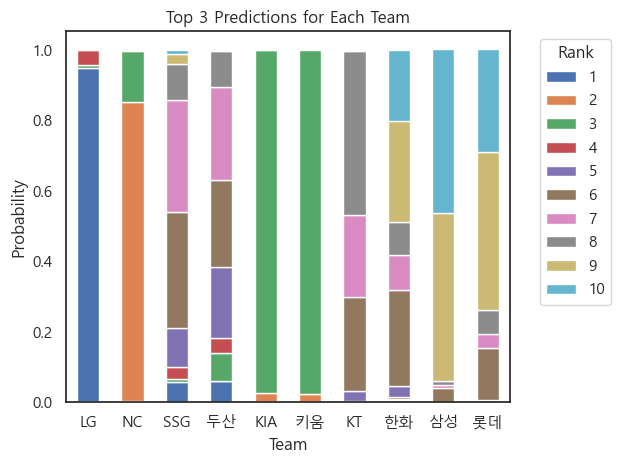

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Your prediction detail data
data = {
    'LG': [0.947, 0.000, 0.010, 0.042, 0.001, 0.000, 0.000, 0.000, 0.000, 0.000],
    'NC': [0.003, 0.850, 0.143, 0.004, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
    'SSG': [0.057, 0.000, 0.009, 0.033, 0.113, 0.327, 0.318, 0.102, 0.030, 0.010],
    '두산': [0.059, 0.002, 0.079, 0.043, 0.202, 0.246, 0.264, 0.100, 0.004, 0.001],
    'KIA': [0.000, 0.026, 0.974, 0.000, 0.000, 0.000, 0.000, 0.000, 0.001, 0.000],
    '키움': [0.000, 0.024, 0.975, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
    'KT': [0.001, 0.000, 0.001, 0.001, 0.030, 0.266, 0.232, 0.465, 0.004, 0.001],
    '한화': [0.007, 0.000, 0.003, 0.006, 0.030, 0.273, 0.099, 0.094, 0.287, 0.201],
    '삼성': [0.000, 0.000, 0.000, 0.001, 0.001, 0.038, 0.008, 0.012, 0.478, 0.464],
    '롯데': [0.001, 0.000, 0.000, 0.001, 0.005, 0.148, 0.040, 0.067, 0.449, 0.290]
}

# Create a DataFrame from the data
pred_top3_df = pd.DataFrame(data)

# Set the ranks as the index for easier plotting
pred_top3_df.index = range(1, 11)

# Transpose the DataFrame to have teams as columns
pred_top3_transposed = pred_top3_df.transpose()

# Create a bar plot for the top 3 predictions
plt.figure(figsize=(12, 6))
pred_top3_transposed.plot(kind="bar", stacked=True)
plt.xlabel("Team")
plt.ylabel("Probability")
plt.title("Top 3 Predictions for Each Team")
plt.legend(title="Rank", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict

# X 데이터 전처리 함수 (Preprocessing function for X)
def preprocess_X(X):
    # 리그별 데이터를 저장할 딕셔너리 생성
    db = defaultdict(list)
    # 정규화된 데이터를 저장할 딕셔너리 생성
    n_db = defaultdict(list)
    
    # 입력된 데이터프레임의 각 행을 반복 처리
    for item in X.itertuples():
        # 두 번째 열이 'LEAGUE'인 경우
        if item[2] == 'LEAGUE':
            # 리그별 데이터를 'db' 딕셔너리에 저장
            db[item[1]] = [item[3], item[4], item[5], item[6], item[7]]
        else:
            # 'db'를 기반으로 정규화된 값을 계산하고 'n_db'에 저장
            n_db['AVG'].append(item[3] / db[item[1]][0])
            n_db['OBP'].append(item[4] / db[item[1]][1])
            n_db['SLG'].append(item[5] / db[item[1]][2])
            n_db['ERA'].append(item[6] / db[item[1]][3])
            n_db['WHIP'].append(item[7] / db[item[1]][4])
    
    # 'n_db'를 데이터프레임으로 변환하여 반환
    return pd.DataFrame(n_db)

# y 데이터 전처리 함수 (Preprocessing function for y)
def preprocess_y(y):
    # 결측값(NaN)이 있는 행을 입력된 시리즈에서 제거
    y.dropna(inplace=True)
    return y

# 데이터 스케일링 함수 (Scaling function)
def standard_X(X, **kwargs):
    mean, std = 0, 0
    if not kwargs:
        # 판다스 함수를 사용하여 평균과 표준편차 계산
        mean = X.mean(axis=0, skipna=False)
        std = X.std()
    else:
        # 주어진 평균과 표준편차 사용
        mean = kwargs["mean"]
        std = kwargs["std"]
    
    # 데이터프레임의 각 열을 표준화 처리
    for col in X.columns:
        X[col] = (X[col] - mean[col]) / std[col]
    
    # 표준화된 데이터프레임과 계산된 평균, 표준편차 반환
    return X, mean, std
